In [0]:
import pandas as pd
import numpy as np
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import seaborn as sns

In [0]:
sc.stop()

In [0]:
sc = SparkContext()
spark = SparkSession(sc)
sqlContext = SQLContext(sc)

In [0]:
bucket="s3://dsde6007.rahul/sample_geo.txt"

In [0]:
data = sc.textFile(bucket)

In [0]:
def clean_data(data):
  data = data.split("\n")
  data = data.split("\t")
  data[0] = data[0].astype(float)
  data[1] = data[1].astype(float)
  data[2] = data[2].astype(int)
  return data

In [0]:
data = clean_data(data)

In [0]:
data.take(5)

[(37.77253945, -77.49954987, 1),
 (42.09013298, -87.68915558, 2),
 (39.56341754, -75.58753204, 3),
 (39.45302347, -87.69374084, 4),
 (38.9537989, -77.01656342, 5)]

In [0]:
data = data.collect()

In [0]:
df = pd.DataFrame(data, columns = ["Latitude", "Longitude", "Index"])

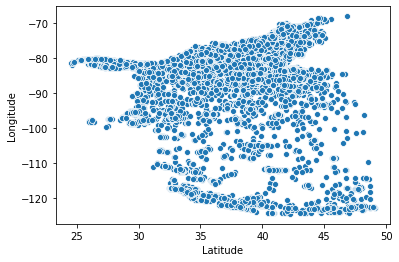

In [0]:
ax = sns.scatterplot(x = "Latitude", y = "Longitude", data = df)